### **MNIST Dataset(Exp1)**

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X,y = fetch_openml("mnist_784", version=1, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X /= 255.0

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50))
mlp.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 50))

In [ ]:
y_pred = mlp.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

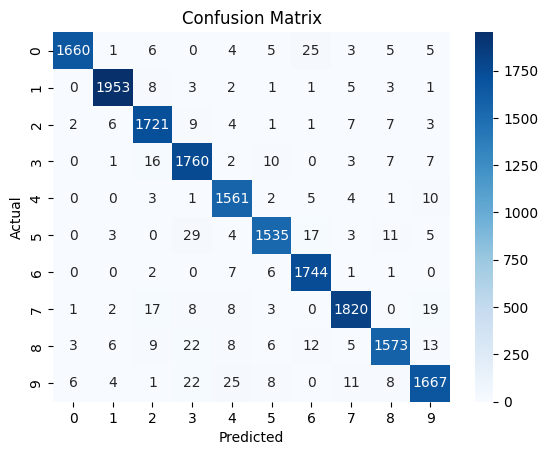

In [ ]:
sns.heatmap(cm, cmap="Blues", annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### **Understanding Packages (Exp2)**

In [ ]:
# Tensorflow

import tensorflow as tf

a = tf.constant([1,2,3])
b = tf.constant([7,6,5])
z = a+b

print(z.numpy())

[8 8 8]


In [ ]:
# Keras

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2938 - accuracy: 0.9139
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1382 - accuracy: 0.9589
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1037 - accuracy: 0.9684
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0873 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0731 - accuracy: 0.9772


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0728 - accuracy: 0.9782


[0.0728209987282753, 0.9782000184059143]

In [ ]:
# PyTorch

import torch

a = torch.tensor([1,2,3,4])
b = torch.tensor([8,7,6,5])
print(a + b)
print(a.shape)

tensor([9, 9, 9, 9])
torch.Size([4])


### **Performance Optimization using Hyperparameter Tuning (Exp3)**

In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

def CreateModel(num_units, learning_rate):
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(num_units, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation="softmax")
  ])
  customOptimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(optimizer=customOptimizer, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
  return model

paramGrid = {
    "learning_rate": [0.1, 0.01, 0.001],
    "num_units": [32, 64, 128]
}

kerasModel = KerasClassifier(num_units=32, learning_rate=0.1, build_fn=CreateModel, batch_size=64, epochs=3)
grid = GridSearchCV(estimator=kerasModel, param_grid=paramGrid, cv=3)

gridResult = grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 5s 7ms/step - loss: 1.4459 - accuracy: 0.5062
Epoch 2/3
625/625 [==============================] - 6s 9ms/step - loss: 1.4556 - accuracy: 0.4909
Epoch 3/3
313/313 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 5s 6ms/step - loss: 1.2706 - accuracy: 0.6029
Epoch 2/3
625/625 [==============================] - 4s 6ms/step - loss: 1.2620 - accuracy: 0.6014
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 2s 3ms/step - loss: 1.4078 - accuracy: 0.5152
Epoch 2/3
625/625 [==============================] - 2s 2ms/step - loss: 1.3820 - accuracy: 0.5272
Epoch 3/3
313/313 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 4s 5ms/step - loss: 1.3703 - accuracy: 0.5681
Epoch 2/3
625/625 [==============================] - 4s 6ms/step - loss: 1.2637 - accuracy: 0.5955
Epoch 3/3
313/313 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 4s 5ms/step - loss: 1.2968 - accuracy: 0.5958
Epoch 2/3
625/625 [==============================] - 4s 6ms/step - loss: 1.2551 - accuracy: 0.5713
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 2s 3ms/step - loss: 1.3996 - accuracy: 0.5394
Epoch 2/3
625/625 [==============================] - 4s 6ms/step - loss: 1.2756 - accuracy: 0.5853
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 3s 4ms/step - loss: 1.5225 - accuracy: 0.4998
Epoch 2/3
625/625 [==============================] - 2s 4ms/step - loss: 1.4065 - accuracy: 0.4969
Epoch 3/3
313/313 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 4s 5ms/step - loss: 1.2394 - accuracy: 0.6633
Epoch 2/3
625/625 [==============================] - 3s 4ms/step - loss: 1.2006 - accuracy: 0.6309
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 4s 5ms/step - loss: 1.3351 - accuracy: 0.6177
Epoch 2/3
625/625 [==============================] - 4s 7ms/step - loss: 1.2045 - accuracy: 0.6133
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 2s 3ms/step - loss: 0.4810 - accuracy: 0.8463
Epoch 2/3
625/625 [==============================] - 2s 3ms/step - loss: 0.3510 - accuracy: 0.8887
Epoch 3/3
313/313 [==============================] - 2s 7ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 3s 4ms/step - loss: 0.4678 - accuracy: 0.8544
Epoch 2/3
625/625 [==============================] - 2s 3ms/step - loss: 0.3315 - accuracy: 0.8972
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 3s 4ms/step - loss: 0.4489 - accuracy: 0.8604
Epoch 2/3
625/625 [==============================] - 3s 4ms/step - loss: 0.3194 - accuracy: 0.9016
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 2s 3ms/step - loss: 0.3428 - accuracy: 0.8952
Epoch 2/3
625/625 [==============================] - 2s 4ms/step - loss: 0.2265 - accuracy: 0.9313
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 2s 3ms/step - loss: 0.3272 - accuracy: 0.8998
Epoch 2/3
625/625 [==============================] - 2s 3ms/step - loss: 0.2227 - accuracy: 0.9317
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 4s 5ms/step - loss: 0.3488 - accuracy: 0.8934
Epoch 2/3
625/625 [==============================] - 3s 4ms/step - loss: 0.2252 - accuracy: 0.9324
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 3s 4ms/step - loss: 0.3048 - accuracy: 0.9081
Epoch 2/3
625/625 [==============================] - 3s 4ms/step - loss: 0.2032 - accuracy: 0.9387
Epoch 3/3
313/313 [==============================] - 2s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 3s 4ms/step - loss: 0.3061 - accuracy: 0.9065
Epoch 2/3
625/625 [==============================] - 3s 4ms/step - loss: 0.2002 - accuracy: 0.9405
Epoch 3/3
313/313 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 3s 4ms/step - loss: 0.3064 - accuracy: 0.9071
Epoch 2/3
625/625 [==============================] - 3s 4ms/step - loss: 0.2030 - accuracy: 0.9402
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 3s 4ms/step - loss: 0.6136 - accuracy: 0.8188
Epoch 2/3
625/625 [==============================] - 3s 4ms/step - loss: 0.3476 - accuracy: 0.8977
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 2s 3ms/step - loss: 0.6087 - accuracy: 0.8227
Epoch 2/3
625/625 [==============================] - 2s 4ms/step - loss: 0.3424 - accuracy: 0.9000
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 2s 3ms/step - loss: 0.6344 - accuracy: 0.8123
Epoch 2/3
625/625 [==============================] - 2s 3ms/step - loss: 0.3523 - accuracy: 0.8975
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 4s 5ms/step - loss: 0.4743 - accuracy: 0.8630
Epoch 2/3
625/625 [==============================] - 3s 4ms/step - loss: 0.2461 - accuracy: 0.9289
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 3s 3ms/step - loss: 0.4847 - accuracy: 0.8576
Epoch 2/3
625/625 [==============================] - 2s 4ms/step - loss: 0.2550 - accuracy: 0.9262
Epoch 3/3
313/313 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 2s 3ms/step - loss: 0.5041 - accuracy: 0.8535
Epoch 2/3
625/625 [==============================] - 2s 3ms/step - loss: 0.2568 - accuracy: 0.9253
Epoch 3/3
313/313 [==============================] - 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 4s 5ms/step - loss: 0.4014 - accuracy: 0.8846
Epoch 2/3
625/625 [==============================] - 3s 4ms/step - loss: 0.1969 - accuracy: 0.9417
Epoch 3/3
313/313 [==============================] - 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 5s 7ms/step - loss: 0.3896 - accuracy: 0.8885
Epoch 2/3
625/625 [==============================] - 4s 6ms/step - loss: 0.1955 - accuracy: 0.9436
Epoch 3/3
313/313 [==============================] - 1s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
625/625 [==============================] - 7s 9ms/step - loss: 0.4004 - accuracy: 0.8859
Epoch 2/3
625/625 [==============================] - 5s 8ms/step - loss: 0.1906 - accuracy: 0.9454
Epoch 3/3
313/313 [==============================] - 2s 4ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/3
938/938 [==============================] - 7s 6ms/step - loss: 0.3424 - accuracy: 0.9011
Epoch 2/3
938/938 [==============================] - 8s 8ms/step - loss: 0.1643 - accuracy: 0.9510
Epoch 3/3
938/938 [==============================] - 8s 8ms/step - loss: 0.1217 - accuracy: 0.9642


In [ ]:
print(gridResult.best_params_)
print(gridResult.best_score_)

{'learning_rate': 0.001, 'num_units': 128}
0.9608500000000001


In [ ]:
bestModel = gridResult.best_estimator_
y_pred = bestModel.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

157/157 [==============================] - 0s 2ms/step
0.9699


### **Optimization Techniques Comparision (Exp4)**

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

def CreateModel(optimizerModel):
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation="relu"),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation="softmax")
  ])
  model.compile(optimizer=optimizerModel, loss="sparse_categorical_crossentropy", metrics=['accuracy'])
  return model

optimizers = {
    "SGD": tf.keras.optimizers.SGD(),
    "Momentum": tf.keras.optimizers.SGD(momentum=0.9),
    "Nesterov": tf.keras.optimizers.SGD(momentum=0.9, nesterov=True),
    "RMS Prop": tf.keras.optimizers.RMSprop(),
    "AdaGrad": tf.keras.optimizers.Adagrad(),
    "Adam": tf.keras.optimizers.Adam()
}

accuracies = {}

for name, optimizerModel in optimizers.items():
  model = CreateModel(optimizerModel)
  model = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=0)
  accuracies[name] = model.history["accuracy"]

In [ ]:
print(accuracies)

{'SGD': [0.798966646194458, 0.8896333575248718, 0.9062333106994629, 0.9172666668891907, 0.9255833625793457, 0.9318166375160217, 0.9362000226974487, 0.940833330154419, 0.9426500201225281, 0.9465166926383972, 0.949400007724762, 0.9505333304405212, 0.953083336353302, 0.9540500044822693, 0.9573333263397217, 0.9574999809265137, 0.9589999914169312, 0.9614666700363159, 0.9620000123977661, 0.9623000025749207, 0.9642000198364258, 0.9654333591461182, 0.9662500023841858, 0.9667999744415283, 0.9677500128746033, 0.9675833582878113, 0.9692333340644836, 0.97038334608078, 0.9696333408355713, 0.9706833362579346, 0.9714000225067139, 0.972599983215332, 0.9721166491508484, 0.9725666642189026, 0.9732166528701782, 0.9740999937057495, 0.9739999771118164, 0.9738333225250244, 0.9750166535377502, 0.9741166830062866, 0.9759500026702881, 0.9760833382606506, 0.975266695022583, 0.9765999913215637, 0.9771166443824768, 0.9778000116348267, 0.9778833389282227, 0.9778833389282227, 0.977816641330719, 0.9780666828155518],

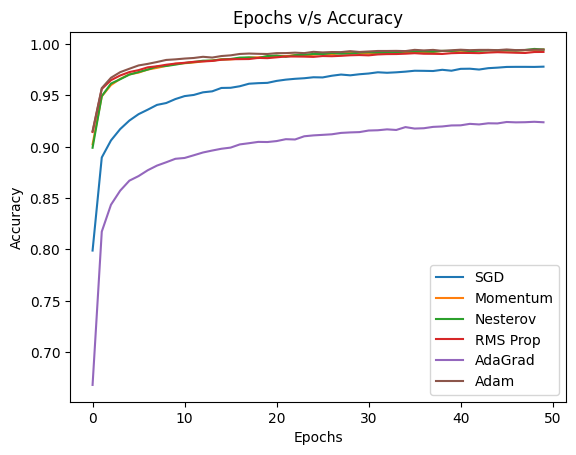

In [ ]:
for name, epochAccuracy in accuracies.items():
  plt.plot(epochAccuracy, label=name)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Epochs v/s Accuracy")
plt.legend()
plt.show()

### **Regularization Techniques (Exp6)**

In [ ]:
import tensorflow as tf
from  tensorflow.keras.datasets import mnist
from sklearn.metrics import accuracy_score

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
def varyRegularizer(regularizer):
  model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
  ])

  if regularizer == "L1":
    model.add(tf.keras.layers.Dense(128, activation="relu", kernel_regularizer="l1"))
  elif regularizer == "L2":
    model.add(tf.keras.layers.Dense(128, activation="relu", kernel_regularizer="l2"))
  elif regularizer == "Dropout":
    model.add(tf.keras.layers.Dense(128, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.2))
  else:
    model.add(tf.keras.layers.Dense(128, activation="relu"))
  model.add(tf.keras.layers.Dense(10, activation="softmax"))
  return model

regularizers = ["L1", "L2", "Dropout"]
for regularizer in regularizers:
  model = varyRegularizer(regularizer)
  model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
  model.fit(x_train, y_train, epochs=5, verbose=0)
  loss, accuracy = model.evaluate(x_test, y_test)
  print(regularizer, accuracy, sep=" : ")

# Early Stopping

model = varyRegularizer("Early Stopping")
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=5, callbacks=[tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=2)], verbose=0)
loss, accuracy = model.evaluate(x_test, y_test)
print("Early Stopping", accuracy, sep=" : ")

313/313 [==============================] - 1s 2ms/step - loss: 0.9027 - accuracy: 0.8828
L1 : 0.8827999830245972
313/313 [==============================] - 1s 2ms/step - loss: 0.2950 - accuracy: 0.9539
L2 : 0.9538999795913696
313/313 [==============================] - 1s 3ms/step - loss: 0.0718 - accuracy: 0.9781
Dropout : 0.9781000018119812
313/313 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9777
Early Stopping : 0.9776999950408936


### **Denoising AutoEncoders (Exp 5)**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, BatchNormalization
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

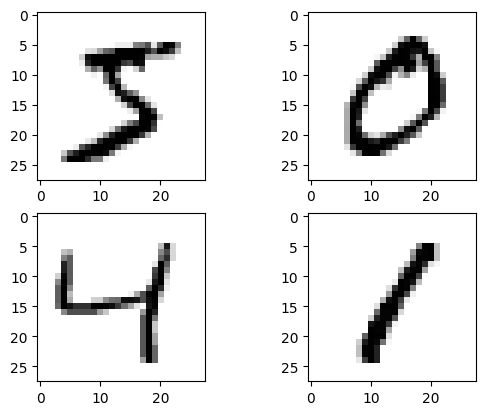

In [ ]:
for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(x_train[i], cmap=plt.cm.binary)

In [ ]:
factor = 0.5

x_train_noisy = x_train + factor*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + factor*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0, 255)
x_test_noisy = np.clip(x_test_noisy, 0, 255)

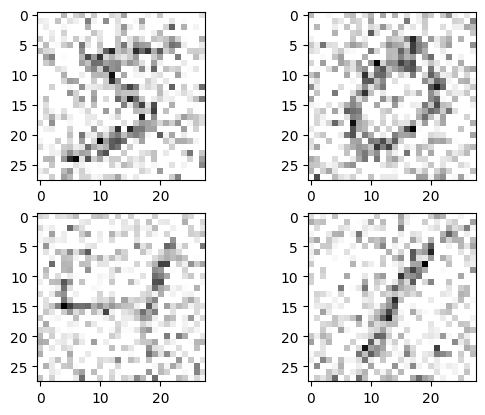

In [ ]:
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(x_train_noisy[i].reshape(1, 28, 28)[0], cmap=plt.cm.binary)

In [ ]:
params = {
    "padding": "same",
    "activation": "relu"
}

model = tf.keras.Sequential([

    Conv2D(16, (3, 3), **params, input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, (3, 3), **params),
    BatchNormalization(),
    Conv2D(64, (3, 3), **params),

    Conv2DTranspose(64, (3, 3), **params),
    BatchNormalization(),
    Conv2DTranspose(32, (3, 3), **params),
    BatchNormalization(),
    Conv2DTranspose(16, (3, 3), **params),

    Conv2D(1, (3, 3), **params)

])

In [ ]:
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_transpose (Conv2DTr  (None, 28, 28, 64)        3

In [ ]:
history = model.fit(x_train_noisy, x_train, epochs=5, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/5
235/235 [==============================] - 21s 53ms/step - loss: 0.0244 - accuracy: 0.8088 - val_loss: 0.0431 - val_accuracy: 0.8112
Epoch 2/5
235/235 [==============================] - 11s 46ms/step - loss: 0.0123 - accuracy: 0.8131 - val_loss: 0.0117 - val_accuracy: 0.8128
Epoch 3/5
235/235 [==============================] - 11s 47ms/step - loss: 0.0115 - accuracy: 0.8134 - val_loss: 0.0117 - val_accuracy: 0.8119
Epoch 4/5
235/235 [==============================] - 11s 48ms/step - loss: 0.0111 - accuracy: 0.8135 - val_loss: 0.0110 - val_accuracy: 0.8128
Epoch 5/5
235/235 [==============================] - 11s 46ms/step - loss: 0.0108 - accuracy: 0.8136 - val_loss: 0.0109 - val_accuracy: 0.8123


1/1 [==============================] - 0s 23ms/step


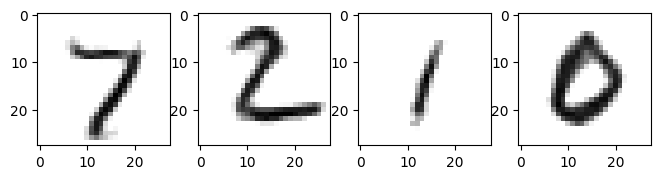

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(4):
  plt.subplot(5, 5, i+1)
  plt.imshow(model.predict(x_test_noisy[i].reshape(1,28,28,1)).reshape(1,28,28)[0], cmap=plt.cm.binary)

### **VGG16 and AlexNet (Exp 7)**

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tfds.load("tf_flowers", split=["train[:70%]", "train[:30%]"], as_supervised=True, batch_size=-1)

x_train = tf.image.resize(x_train, (300, 300))
x_test = tf.image.resize(x_test, (300, 300))

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

In [ ]:
EPOCHS = PATIENCE = 3

params = {
    "strides": (1,1),
    "kernel_size": (3,3),
    "padding": "same",
    "activation": "relu"
}

model = tf.keras.Sequential([
    Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation="relu", input_shape=x_train[0].shape),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(384, **params),
    Conv2D(384, **params),
    Conv2D(256, **params),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation="relu"),
    Dropout(0.5),
    Dense(4096, activation="relu"),
    Dropout(0.5),
    Dense(5, activation="softmax")
])

x_train = x_train / 255
x_test = x_test / 255

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer="adam", metrics=["accuracy"])
es = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=PATIENCE, restore_best_weights=True, mode="max")
alexHistory = model.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2, batch_size=64, callbacks=[es])

Epoch 1/3
33/33 [==============================] - 25s 254ms/step - loss: 1.7094 - accuracy: 0.2477 - val_loss: 1.6035 - val_accuracy: 0.2490
Epoch 2/3
33/33 [==============================] - 5s 151ms/step - loss: 1.6015 - accuracy: 0.2487 - val_loss: 1.6050 - val_accuracy: 0.2490
Epoch 3/3
33/33 [==============================] - 5s 151ms/step - loss: 1.6005 - accuracy: 0.2487 - val_loss: 1.6087 - val_accuracy: 0.2490


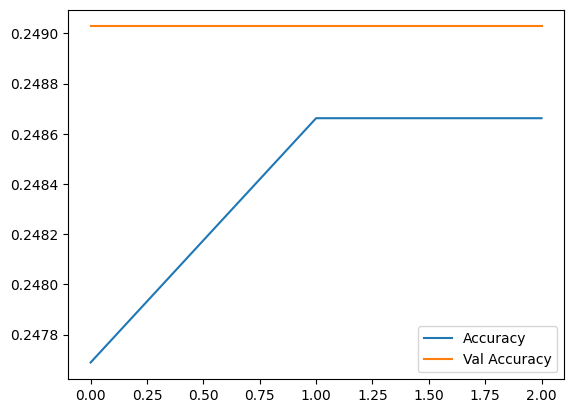

In [ ]:
plt.plot(alexHistory.history["accuracy"], label="Accuracy")
plt.plot(alexHistory.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

vgg = VGG16(weights="imagenet", include_top=False, input_shape=x_train[0].shape)
vgg.trainable = False

In [ ]:
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [ ]:
model = tf.keras.Sequential([
    vgg,
    Flatten(),
    Dense(50, activation="relu"),
    Dense(20, activation="relu"),
    Dense(5, activation="softmax")
])

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
vggHistory = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[es])

In [ ]:
plt.plot(vggHistory.history["accuracy"], label="Accuracy")
plt.plot(vggHistory.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.show()

In [ ]:
plt.plot(alexHistory.history["val_accuracy"], label="Accuracy")
plt.plot(vggHistory.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.show()

### **RNN for text generation (Exp 9)**

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Embedding

In [4]:
inputText = "Kiran Deep is a Good boy\nHe is well know for his popularity\nHe is a gamer and a passionate something that you say"

corpus = inputText.lower().split("\n")
tk = Tokenizer()
tk.fit_on_texts(corpus)
n = len(tk.word_index) + 1

In [21]:
inputSeq = []

for line in corpus:
  tokenList = tk.texts_to_sequences([line])[0]
  for i in range(1, len(tokenList)):
    inputSeq.append(tokenList[:i+1])
print(inputSeq)

[[4, 5], [4, 5, 1], [4, 5, 1, 2], [4, 5, 1, 2, 6], [4, 5, 1, 2, 6, 7], [3, 1], [3, 1, 8], [3, 1, 8, 9], [3, 1, 8, 9, 10], [3, 1, 8, 9, 10, 11], [3, 1, 8, 9, 10, 11, 12], [3, 1], [3, 1, 2], [3, 1, 2, 13], [3, 1, 2, 13, 14], [3, 1, 2, 13, 14, 2], [3, 1, 2, 13, 14, 2, 15], [3, 1, 2, 13, 14, 2, 15, 16], [3, 1, 2, 13, 14, 2, 15, 16, 17], [3, 1, 2, 13, 14, 2, 15, 16, 17, 18], [3, 1, 2, 13, 14, 2, 15, 16, 17, 18, 19]]


In [48]:
maxSeqLen = max([len(x) for x in inputSeq])

inputSeq = pad_sequences(inputSeq, maxlen=maxSeqLen)
inputSeq

X, y = inputSeq[:, :-1], inputSeq[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=n)

In [ ]:
model = tf.keras.Sequential([
    Embedding(n, 64, input_length=maxSeqLen-1),
    Bidirectional(LSTM(20)),
    Dense(n, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X, y, epochs=500)

In [54]:
seedText = "kiran"
nextWords = 5

for i in range(nextWords):
  tokenList = tk.texts_to_sequences([seedText])[0]
  tokenList = pad_sequences([tokenList], maxlen=maxSeqLen-1)
  pred = model.predict(tokenList, verbose=0)
  outputWord = ""
  for word, index in tk.word_index.items():
    if index == np.argmax(pred, axis=1):
      outputWord = word
      break
  seedText += " " + outputWord
print(seedText)

kiran deep is a good boy
